<a href="https://colab.research.google.com/github/ramprakashyadav/OCR/blob/main/table_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Mar 15 10:18:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.10.0+cu111 True


In [ ]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 919 kB/s 
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 145 kB 22.7 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 130 kB 38.8 MB/s 
     |████████████████████████████████| 749 kB 42.1 MB/s 
     |████████████████████████████████| 843 kB 41.7 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
     |████████████████████████████████| 112 kB 27.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220305-py3-none-any.whl size=61214 sha256=118755079cfaeb0970a4cf10f679acc2be05db8f3b98952c00b46a0fb1a6c6ea
  Stored in directory: /root/.cache/pip/wheels/b5/b7/6e/43b1693d06fac3633af48db68557513b0a37ab38b0a8b798f9
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=d81

In [ ]:
!python -m detectron2.utils.collect_env

----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
numpy                   1.21.5
detectron2              0.6 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5, 8.0, 8.6
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.10.0+cu111 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla K80 (arch=3.7)
Driver version          460.32.03
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.11.1+cu111 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0, 8.6
fvcore                  0.1.5.post20220305
iopath                  0.1.9
cv2              

In [ ]:
# !git clone https://github.com/nikhilsingh291/Multi-Type-TD-TSR.git
!git clone https://github.com/nikhilsingh291/multi-layout-table-extraction.git
!mv multi-layout-table-extraction multi_layout_table_extraction

Cloning into 'multi-layout-table-extraction'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 52 (delta 10), reused 49 (delta 10), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
!pip install --upgrade gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=6a2cabab2b635c7c2eee406eff45ce1afb13f8553fc3ef2194857e1dcae66abd
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [ ]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /content/model_final.pth
100% 1.10G/1.10G [00:05<00:00, 215MB/s]


In [ ]:
!sudo apt install tesseract-ocr 
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,607 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import detectron2
import multi_layout_table_extraction.google_colab.deskew as deskew
import multi_layout_table_extraction.google_colab.table_detection as table_detection
import multi_layout_table_extraction.google_colab.table_structure_recognition_all as tsra
import multi_layout_table_extraction.google_colab.table_structure_recognition_lines as tsrl
import multi_layout_table_extraction.google_colab.table_structure_recognition_wol as tsrwol
import multi_layout_table_extraction.google_colab.table_structure_recognition_lines_wol as tsrlwol
import multi_layout_table_extraction.google_colab.table_xml as txml
import multi_layout_table_extraction.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('./multi_layout_table_extraction/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = './model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [ ]:
# !pip install --upgrade google google-colab gdown

In [ ]:
# document_img = cv2.imread("/content/multi_layout_table_extraction/images/fdsd.png")
# table_detection.plot_prediction(document_img, predictor)

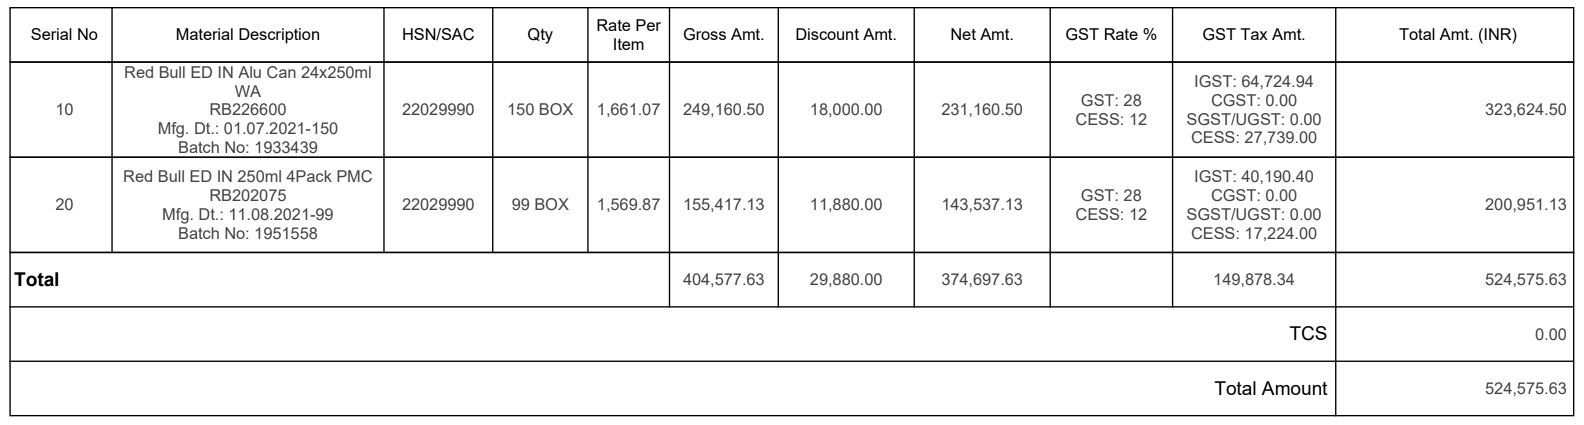

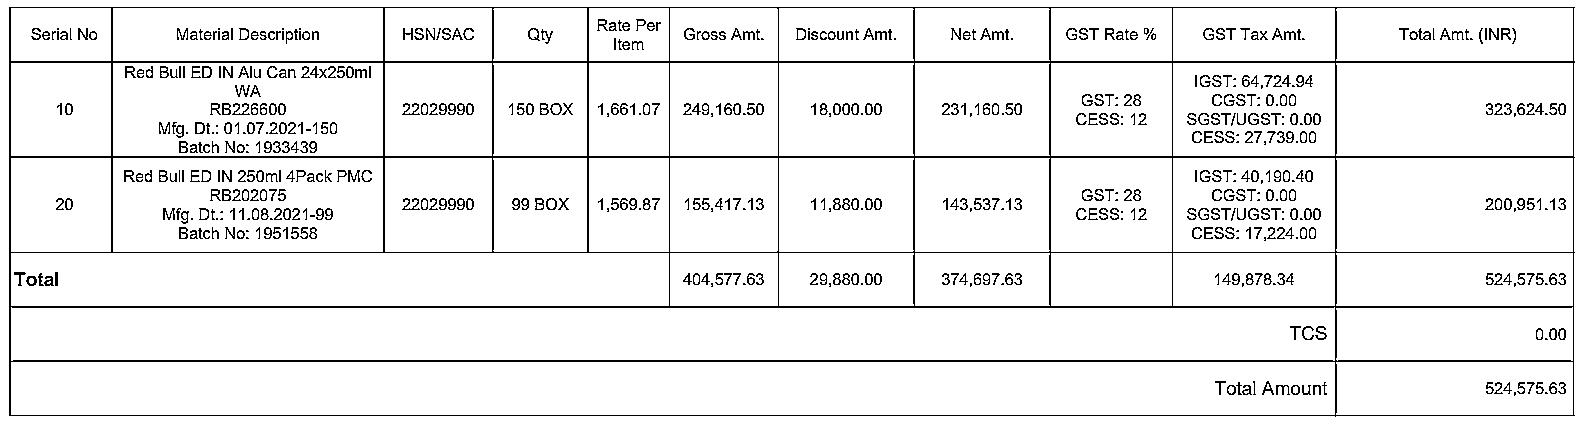

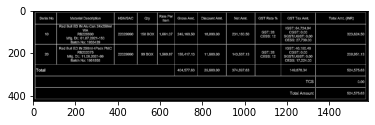

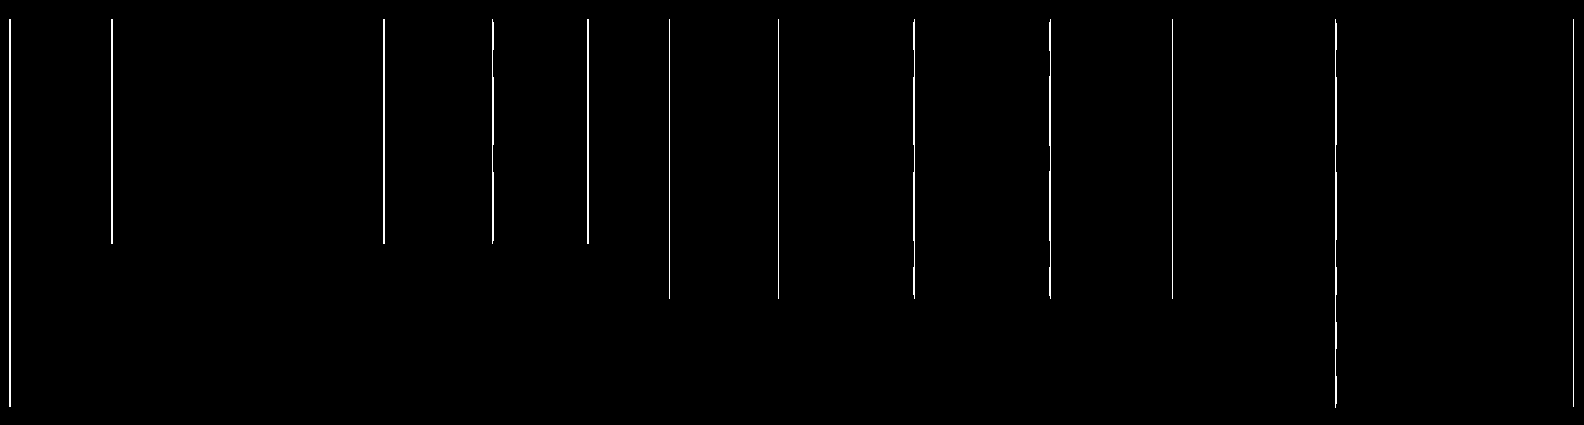

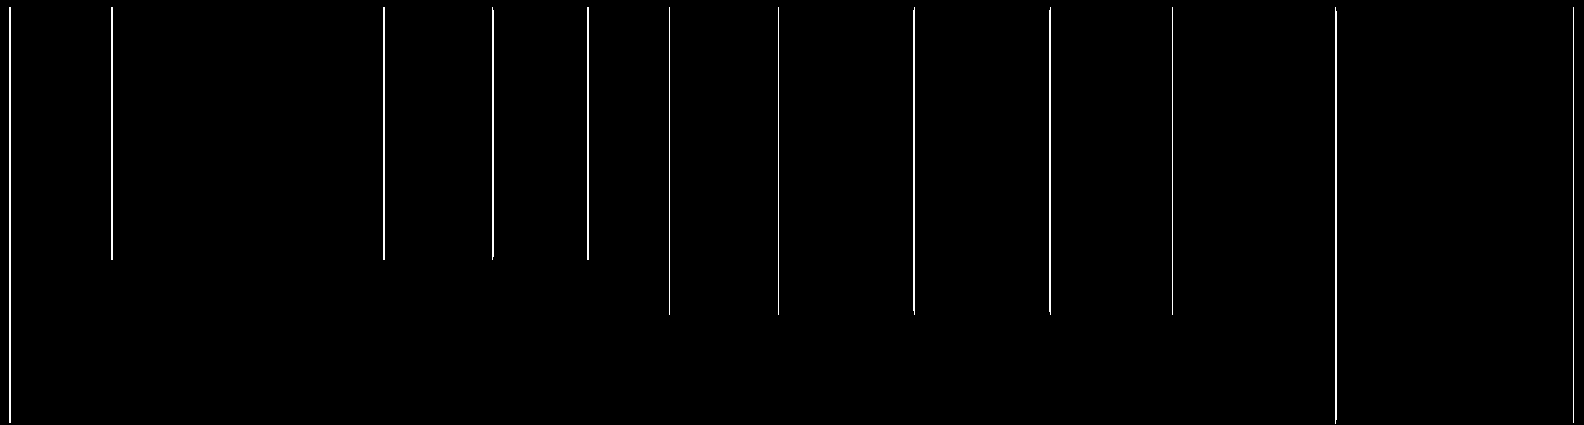

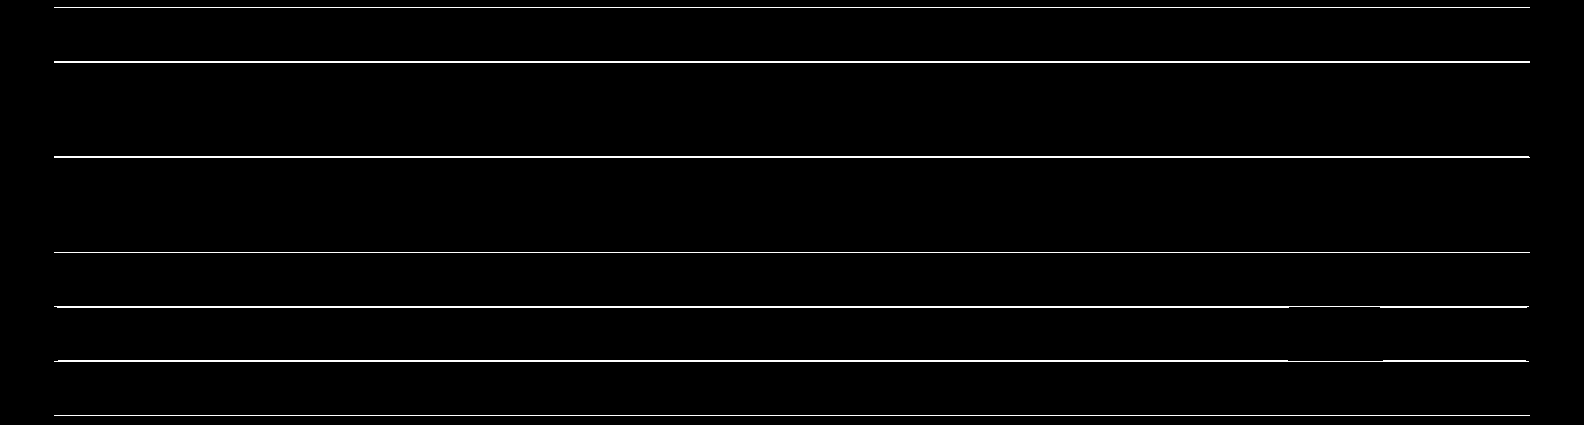

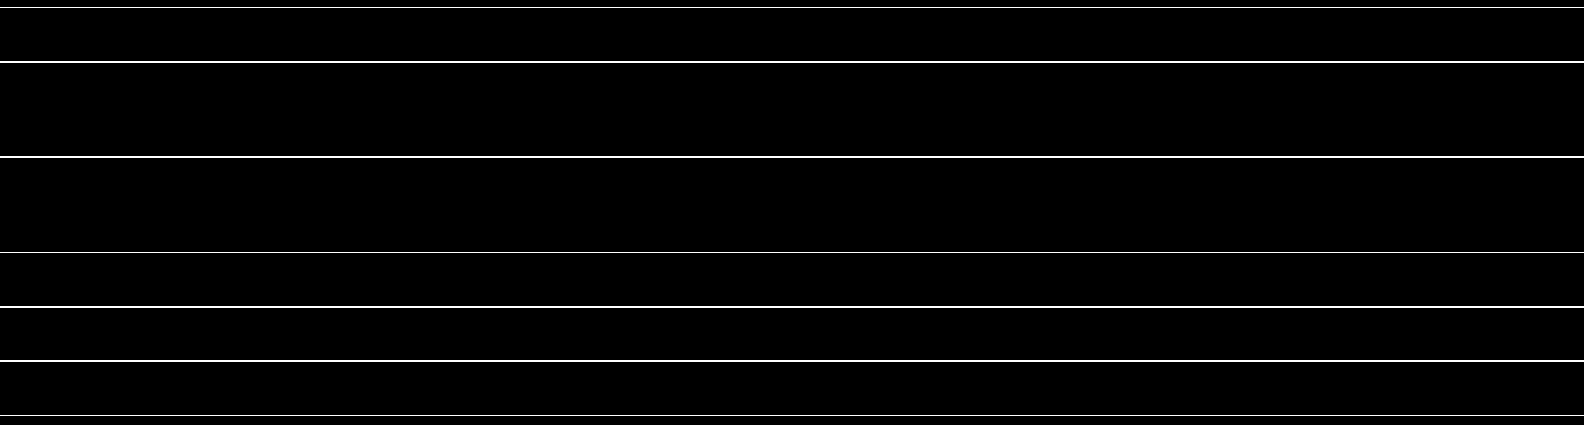

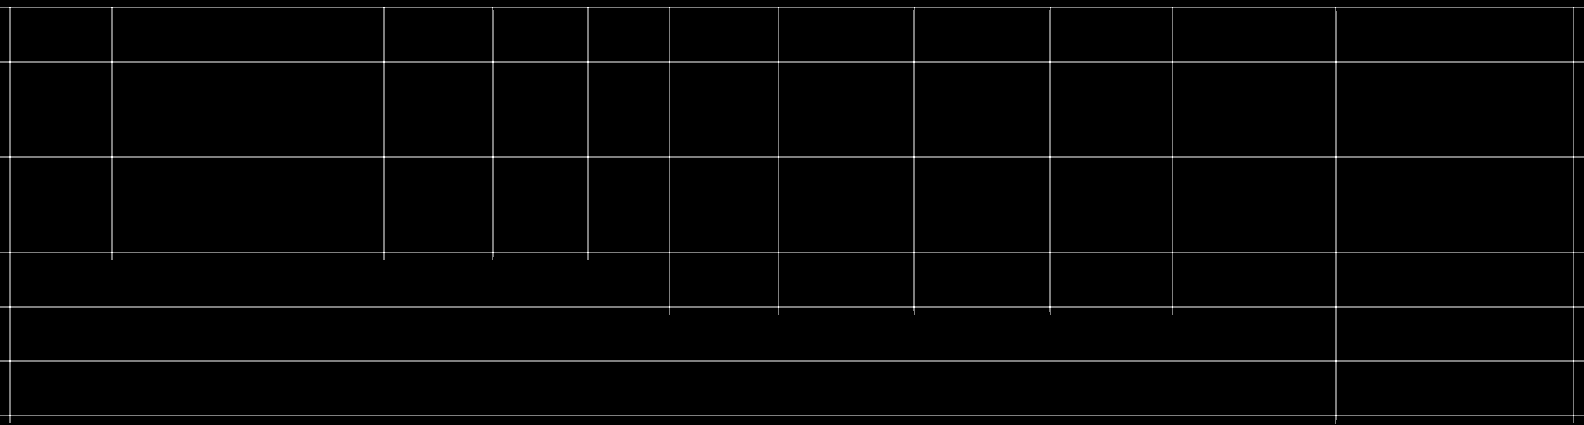

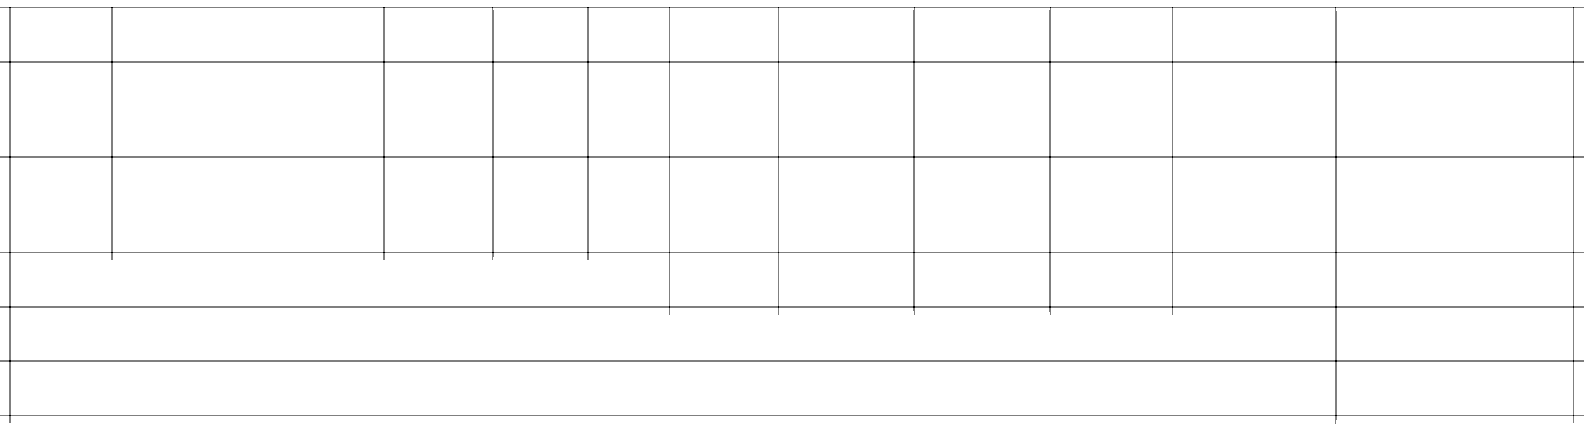

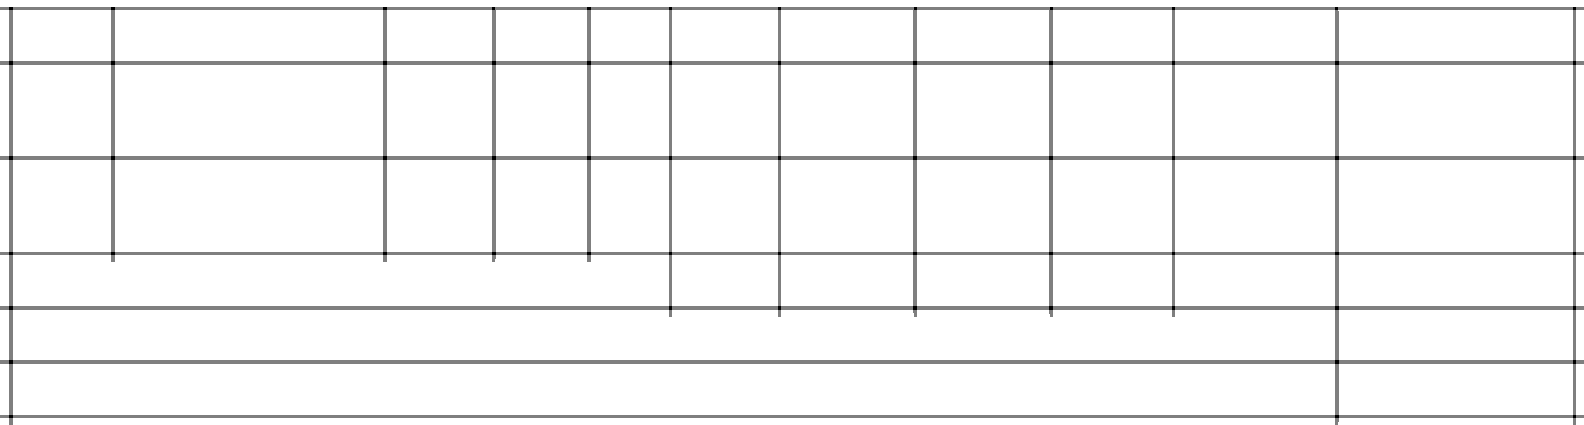

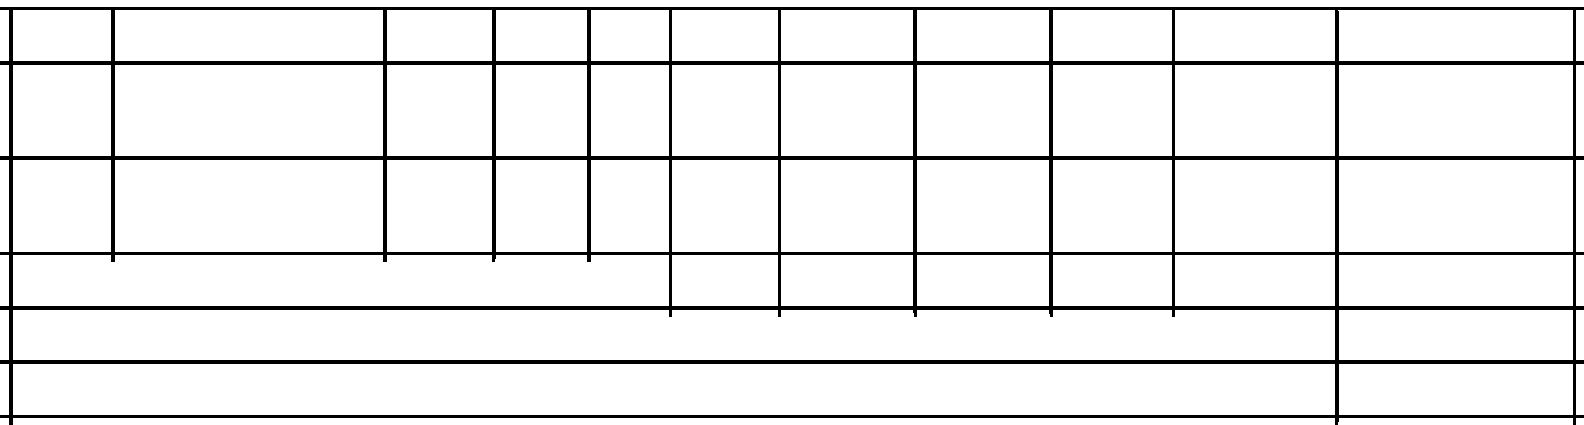

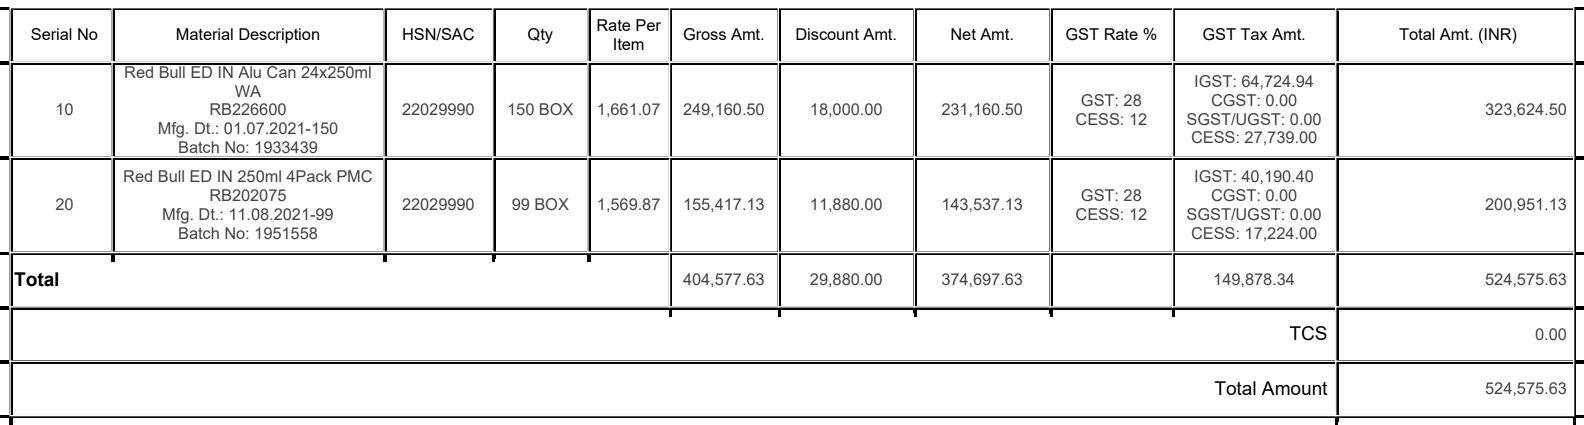

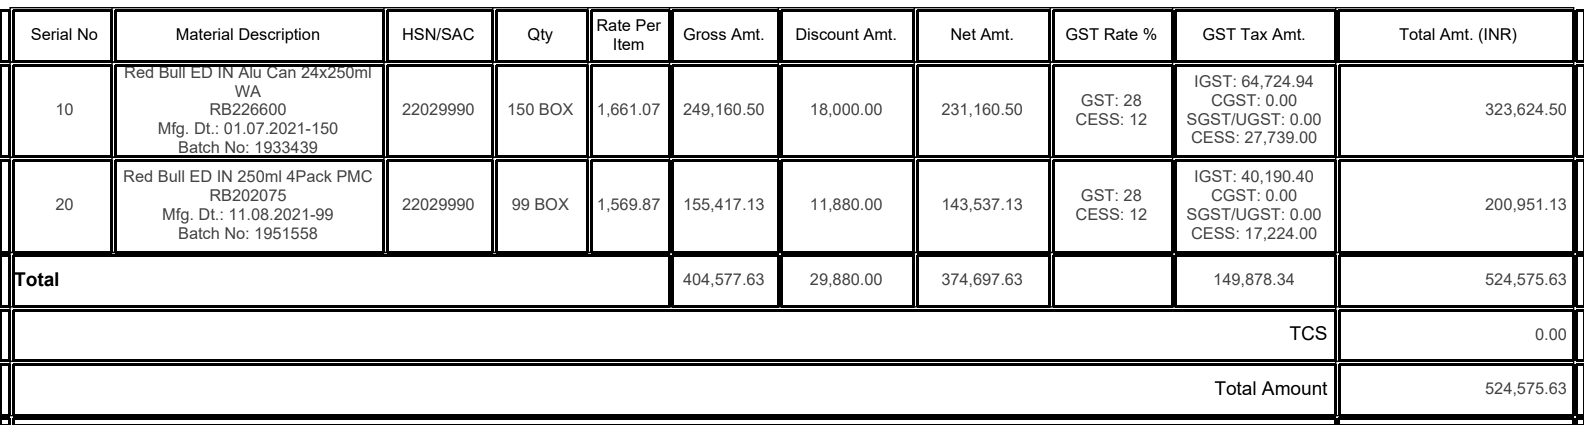

In [ ]:
bordered_table = cv2.imread("/content/multi_layout_table_extraction/images/cap5.png")
list_table_boxes = []

table_list = [bordered_table]

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract as tess
import pytesseract

def output_to_csv (finalboxes, img):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    testx = 0
    # from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
    outer = []
    for i in range(len(finalboxes)):
        for j in range(len(finalboxes[i])):
            inner = ''
            if (len(finalboxes[i][j]) == 0):
                outer.append(' ')
            else:
                for k in range(len(finalboxes[i][j])):
                    y, x, w, h = finalboxes[i][j][k][0], finalboxes[i][j][k][1], finalboxes[i][j][k][2], \
                                finalboxes[i][j][k][3]

                    finalimg = img[x:x + h, y:y + w]
                    print('yo')
                    
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                    # border = cv2.copyMakeBorder(finalimg, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=[255, 255])
                    resizing = cv2.resize(finalimg, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    
                    dilation = cv2.dilate(resizing, kernel, iterations=1)
                    erosion = cv2.erode(dilation, kernel, iterations=2)
                    cv2.imwrite("/content/multi_layout_table_extraction/images/ssd"+str(i)+str(j)+str(k)+".jpg", erosion)

                    if(erosion.sum() != erosion.shape[0]*erosion.shape[1]*255):
                      out = pytesseract.image_to_string(erosion, config='')
                    else:
                        out = ""
                    # print(out)
                    if(out == ""):

                        out = pytesseract.image_to_string(erosion, config='--psm 7')
                        if(len(out[:-2]) >1):
                            out = ""

                    inner = inner + " " + out[:-2]
                outer.append(inner)

    # Creating a dataframe of the generated OCR list
    arr = np.array(outer)
    dataframe = pd.DataFrame(arr.reshape(len(finalboxes), len(finalboxes[0])))
    print(dataframe)
    return dataframe
    # data = dataframe.style.set_properties(align="left")
    # # Converting dataframe into an excel-file
    # data.to_excel("output.xlsx")
        


In [ ]:
!rm /content/multi_layout_table_extraction/images/ssd*.jpg

rm: cannot remove '/content/multi_layout_table_extraction/images/ssd*.jpg': No such file or directory


In [ ]:
out = output_to_csv(list_table_boxes[0], bordered_table)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
  0           1                                                  2   \
0      Serial No                               Material Description   
1             10   Red Bull ED IN Alu Can 24x250ml\nWA\nRB226600...   
2                  Red Bull ED IN 250ml 4Pack PMC\nRB202075\nMfg...   
3                                                             Total   
4                                                               TCS   
5                                                      Total Amount   
6                                                                     

          3         4                5            6               7   \
0    HSN/SAC       Qty   Rate Per\nItem   Gross Amt.   Discount Amt.   
1   22029990   150 BOX         1,661.07   249,160.50      

In [ ]:
out

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,Serial No,Material Description,HSN/SAC,Qty,Rate Per\nItem,Gross Amt.,Discount Amt.,Net Amt.,GST Rate %,GST Tax Amt.,Total Amt. (INR),
1,,10,Red Bull ED IN Alu Can 24x250ml\nWA\nRB226600...,22029990,150 BOX,"1,661.07","249,160.50","18,000.00","231,160.50",GST: 28\nCESS: 12,"IGST: 64,724.94\nCGST: 0.00\nSGST/UGST: 0.00\...","323,624.50",
2,,,Red Bull ED IN 250ml 4Pack PMC\nRB202075\nMfg...,,,"1,569.87","155,417.13","11,880.00","143,537.13",GST: 28\nCESS: 12,"IGST: 40,190.40\nCGST: 0.00\nSGST/UGST: 0.00\...","200,951.13",
3,,,Total,,,,"404,577.63","29,880.00","374,697.63",,"149,878.34","524,575.63",
4,,,TCS,,,,,,,,,0.00,
5,,,Total Amount,,,,,,,,,"524,575.63",
6,,,,,,,,,,,,,


In [ ]:
import cv2
import pytesseract

image = cv2.imread('/content/multi_layout_table_extraction/images/ssd010.jpg')
text = pytesseract.image_to_string(image,lang='eng',config='') 
print(text)

Serial No



In [ ]:
!tesseract /content/multi_layout_table_extraction/images/ssd010.jpg stdout --oem 3 --dpi 300

read_params_file: Can't open 300
Warning. Invalid resolution 0 dpi. Using 70 instead.


In [ ]:
!apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!tesseract  --help-extra

Usage:
  tesseract --help | --help-extra | --help-psm | --help-oem | --version
  tesseract --list-langs [--tessdata-dir PATH]
  tesseract --print-parameters [options...] [configfile...]
  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]

OCR options:
  --tessdata-dir PATH   Specify the location of tessdata path.
  --user-words PATH     Specify the location of user words file.
  --user-patterns PATH  Specify the location of user patterns file.
  -l LANG[+LANG]        Specify language(s) used for OCR.
  -c VAR=VALUE          Set value for config variables.
                        Multiple -c arguments are allowed.
  --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engine mode.
NOTE: These options must occur before any configfile.

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    F